<a href="https://colab.research.google.com/github/rickyswas/Algorithm-comparisons-using-the-Iris-dataset/blob/main/xyz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2

# Define the path to the data and the path to store cropped images
path_to_data = "/content/drive/MyDrive/dataset"
path_to_cr_data = "/content/drive/MyDrive/cropped_dataset"

# Load the Haar Cascade classifiers for face, nose, and mouth detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
nose_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/opencv_haar cascades/haarcascade_mcs_nose.xml')
mouth_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/opencv_haar cascades/haarcascade_mcs_mouth.xml')

def get_cropped_image_with_features(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        # Detect nose and mouth in the face region
        noses = nose_cascade.detectMultiScale(roi_gray)
        mouths = mouth_cascade.detectMultiScale(roi_gray)

        # Check if at least one nose and one mouth are detected
        if len(noses) >= 1 and len(mouths) >= 1:
            return roi_color

    return None

img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    for entry in os.scandir(img_dir):
        print(entry.path)
        cropped_image = get_cropped_image_with_features(entry.path)

        cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
        if cropped_image is not None:
            cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                print("Generating cropped images in folder:", cropped_folder)

            # Save the cropped image
            cv2.imwrite(os.path.join(cropped_folder, entry.name), cropped_image)


In [145]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

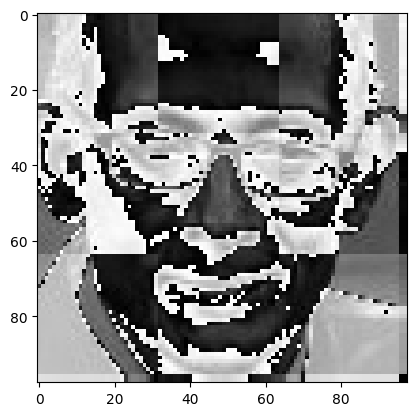

In [152]:
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/clean_dataset/abhijit banerjee_cropped/11nobel1.jpg')
if img is not None:
    im_har = w2d(img, 'db1', 5)
    plt.imshow(im_har, cmap='gray')
else:
    print("Error loading image.")

In [153]:
clean_image_dirs = [
    '/content/drive/MyDrive/clean_dataset/abhijit banerjee_cropped',
    '/content/drive/MyDrive/clean_dataset/amartya sen_cropped',
    '/content/drive/MyDrive/clean_dataset/cv raman_cropped',
    '/content/drive/MyDrive/clean_dataset/har gobind khorana_cropped',
    '/content/drive/MyDrive/clean_dataset/kailash satyarthi_cropped',
    '/content/drive/MyDrive/clean_dataset/mother teresa_cropped',
    '/content/drive/MyDrive/clean_dataset/rabindranath tagore_cropped',
    '/content/drive/MyDrive/clean_dataset/subrahmanyan chandrasekhar_cropped',
    '/content/drive/MyDrive/clean_dataset/venkatraman ramakrishnan_cropped'
]

In [154]:
celebrity_file_names_dict = {}
for img_dir in clean_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'abhijit banerjee_cropped': ['/content/drive/MyDrive/clean_dataset/abhijit banerjee_cropped/AbhijitBanerjee-1.jpg',
  '/content/drive/MyDrive/clean_dataset/abhijit banerjee_cropped/1_BuCEra-_zB5gnlKz5JSsLg.jpg',
  '/content/drive/MyDrive/clean_dataset/abhijit banerjee_cropped/72471047.jpg',
  '/content/drive/MyDrive/clean_dataset/abhijit banerjee_cropped/abhijit-banerjee-151019m1.jpg',
  '/content/drive/MyDrive/clean_dataset/abhijit banerjee_cropped/11nobel1.jpg',
  '/content/drive/MyDrive/clean_dataset/abhijit banerjee_cropped/129091-frcrigsksv-1571066349.jpg',
  '/content/drive/MyDrive/clean_dataset/abhijit banerjee_cropped/800_443660124c7c65a.jpg',
  '/content/drive/MyDrive/clean_dataset/abhijit banerjee_cropped/76506568.jpg',
  '/content/drive/MyDrive/clean_dataset/abhijit banerjee_cropped/16351556991635155699Abhijit_20Banerjee.jpg',
  '/content/drive/MyDrive/clean_dataset/abhijit banerjee_cropped/_109235563_mediaitem109235562.jpg',
  '/content/drive/MyDrive/clean_dataset/abhijit 

In [155]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'abhijit banerjee_cropped': 0,
 'amartya sen_cropped': 1,
 'cv raman_cropped': 2,
 'har gobind khorana_cropped': 3,
 'kailash satyarthi_cropped': 4,
 'mother teresa_cropped': 5,
 'rabindranath tagore_cropped': 6,
 'subrahmanyan chandrasekhar_cropped': 7,
 'venkatraman ramakrishnan_cropped': 8}

In [156]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [157]:
len(X)

443